In [1]:
import pandas as pd
import pylab as plt
%matplotlib inline

In [42]:
df=pd.read_csv('cc-est2019-alldata.csv',encoding='ISO-8859-1')
ef=pd.read_csv('./county_pop_risk_covid.txt')
df['fips']=[str(x).zfill(2)+str(y).zfill(3) for (x,y) in zip(df.STATE.values,df.COUNTY.values)]
ef['fips']=[str(x).zfill(5) for x in ef.county.values]
df=df.set_index('fips').join(ef.set_index('fips'))

In [43]:
def getDF_age(df,AGEGRP0=13,AGEGRP1=19,col=[]):
    #code 14 is 65+ age
    df=df[df.AGEGRP.between(AGEGRP0,AGEGRP1)].reset_index().groupby('fips').sum()
    df=df.reset_index()[col]
    df=df[df.population>0]
    df['covidpc']=df.covid/df.TOT_POP
    display(df.drop(['county','fips'],axis=1).corr())
    return df

In [76]:
df_=getDF_age(df[df.YEAR==12],col=['population','TOT_POP', 'county', 'risk','covid', 'fips'])

,population,TOT_POP,risk,covid,covidpc
population,1.000000,0.988363,0.587137,0.946185,0.085116
TOT_POP,0.988363,1.000000,0.607266,0.929429,0.063069
risk,0.587137,0.607266,1.000000,0.512789,0.175133
covid,0.946185,0.929429,0.512789,1.000000,0.155829
covidpc,0.085116,0.063069,0.175133,0.155829,1.000000


In [115]:
df_=getDF_age(df[df.YEAR==12],AGEGRP0=1,col=['population','TOT_POP', 'county', 'risk','covid', 'fips'])

,population,TOT_POP,risk,covid,covidpc
population,1.000000,1.000000,0.587137,0.946185,0.041950
TOT_POP,1.000000,1.000000,0.587137,0.946185,0.041950
risk,0.587137,0.587137,1.000000,0.512789,0.125367
covid,0.946185,0.946185,0.512789,1.000000,0.126192
covidpc,0.041950,0.041950,0.125367,0.126192,1.000000


In [71]:
#fig=plt.figure(figsize=[12,10])
#plt.scatter_matrix(df_.drop(['fips','county'],axis=1), alpha=0.2,ax=plt.gca());

In [72]:
df_.head()


,population,TOT_POP,county,risk,covid,fips,covidpc
0,167607.0,3911,3003.0,1.72446,5517.0,01001,1.410637
1,669702.0,18786,3009.0,1.79526,18348.0,01003,0.976685
2,74058.0,1995,3015.0,1.54368,2769.0,01005,1.387970
3,67182.0,1547,3021.0,1.55796,2073.0,01007,1.340013
4,173478.0,4465,3027.0,1.61517,4995.0,01009,1.118701


In [140]:
df.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

In [148]:
df_=getDF_age(df[df.YEAR==12],AGEGRP0=14,col=['population','TOT_POP', 'county', 'risk','covid', 'fips'])

,population,TOT_POP,risk,covid,covidpc
population,1.000000,0.984069,0.587137,0.946185,0.088782
TOT_POP,0.984069,1.000000,0.607196,0.926335,0.063234
risk,0.587137,0.607196,1.000000,0.512789,0.177438
covid,0.946185,0.926335,0.512789,1.000000,0.157091
covidpc,0.088782,0.063234,0.177438,0.157091,1.000000


In [149]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data=df_.drop(['population','county','covid','fips'],axis=1)
formula = 'covidpc ~ risk + TOT_POP'
#mod1 = smf.glm(formula=formula, data=data,family=sm.families.InverseGaussian(sm.families.links.log())).fit()
mod2 = smf.glm(formula=formula, data=data,family=sm.families.Gaussian(sm.families.links.log())).fit()
#mod3 = smf.glm(formula=formula, data=data,family=sm.families.Gamma(sm.families.links.log())).fit()
#print(mod1.summary())
print(mod2.summary())
#print(mod3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                covidpc   No. Observations:                 3086
Model:                            GLM   Df Residuals:                     3083
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                         0.30869
Method:                          IRLS   Log-Likelihood:                -2563.7
Date:                Sun, 18 Oct 2020   Deviance:                       951.68
Time:                        10:08:54   Pearson chi2:                     952.
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9562      0.140    -14.008      0.0

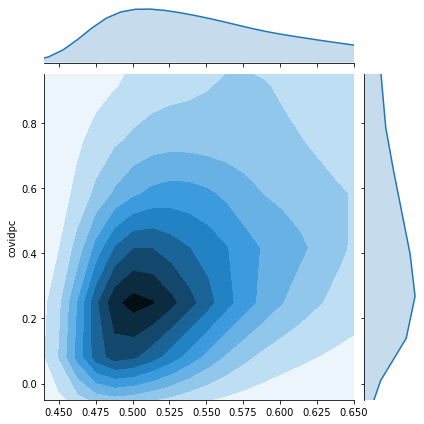

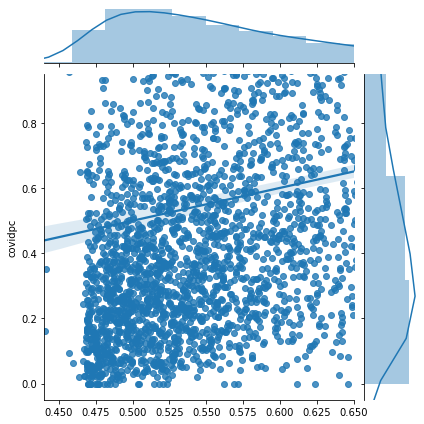

In [152]:
yhat = mod2.mu
import seaborn as sns
ax=sns.jointplot(x=yhat,y=data.covidpc,kind='kde',xlim=[0.44,.65],ylim=[-.05,.95])
ax=sns.jointplot(x=yhat,y=data.covidpc,kind='reg',xlim=[0.44,.65],ylim=[-.05,.95])

In [138]:
ef.corr()

,population,county,llk,risk,covid
population,1.000000,-0.056500,-0.515926,0.587137,0.946185
county,-0.056500,1.000000,0.055920,-0.061186,-0.063144
llk,-0.515926,0.055920,1.000000,-0.985533,-0.445450
risk,0.587137,-0.061186,-0.985533,1.000000,0.512789
covid,0.946185,-0.063144,-0.445450,0.512789,1.000000


In [154]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.TOT_POP = data.TOT_POP -data.T
data=df_.drop(['population','county','covidpc','fips'],axis=1)
formula = 'covid ~ risk + TOT_POP'
#mod1 = smf.glm(formula=formula, data=data,family=sm.families.InverseGaussian(sm.families.links.log())).fit()
mod2 = smf.glm(formula=formula, data=data,family=sm.families.Gaussian(sm.families.links.log())).fit()
#mod3 = smf.glm(formula=formula, data=data,family=sm.families.Gamma(sm.families.links.log())).fit()
#print(mod1.summary())
print(mod2.summary())
#print(mod3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  covid   No. Observations:                 3086
Model:                            GLM   Df Residuals:                     3083
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                      5.4125e+08
Method:                          IRLS   Log-Likelihood:                -35406.
Date:                Sun, 18 Oct 2020   Deviance:                   1.6687e+12
Time:                        10:13:05   Pearson chi2:                 1.67e+12
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8403      0.170     16.737      0.0